# Example 5 - Frequency-Domain Analysis

In [17]:
from CircuitCalculator.SignalProcessing.periodic_functions import RectFunction
from CircuitCalculator.Circuit.solution import ComplexSolution, TimeDomainSolution
from CircuitCalculator.Circuit.circuit import Circuit
from CircuitCalculator.Circuit import components as cmp
from CircuitCalculator.SimpleAnalysis.PointerDiagram import voltage_pointer_diagram_analysis, current_pointer_diagram_analysis, power_pointer_diagram_analysis, plot_pointer_by_id
from CircuitCalculator.SimpleAnalysis.TimeSeries import steady_state_voltage_timedomain_analysis, steady_state_current_timedomain_analysis, plot_timeseries_by_id

In [18]:
circuit = Circuit([
    cmp.PeriodicVoltageSource(id='Uq', V=1, w=5000, wavetype=RectFunction, nodes=('1', '0')),
    cmp.Resistor(id='R', R=2, nodes=('1', '2')),
    cmp.Capacitor(id='C', C=1e-4, nodes=('2', '0')),
    cmp.Ground(nodes=('0',))
])
complex_solution = ComplexSolution(circuit, w=5000)
time_domain_solution = TimeDomainSolution(circuit, w_max=1000000)

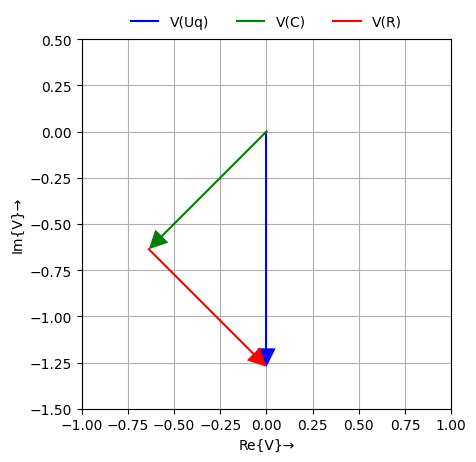

In [25]:
_ = voltage_pointer_diagram_analysis(
    plot_pointer_by_id('Uq', color='blue'),
    plot_pointer_by_id('C', color='green'),
    plot_pointer_by_id('R', origin='C', color='red'),
    solution=complex_solution,
    pd_lim=(-1, 1, -1.5, 0.5)
)

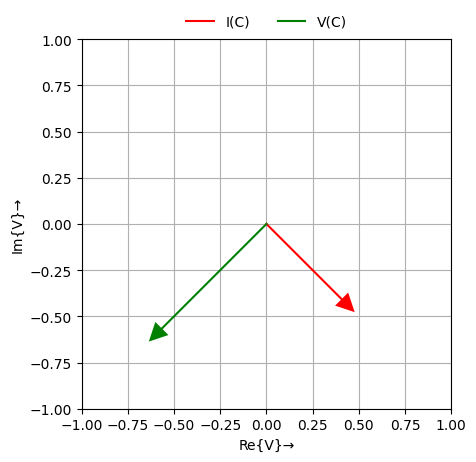

In [20]:
_ = voltage_pointer_diagram_analysis(
    plot_pointer_by_id('C', color='green'),
    solution=complex_solution,
    layout_fcn=lambda : current_pointer_diagram_analysis(
        plot_pointer_by_id('C', scaling=1.5, color='red', label='I(C)'),
        solution=complex_solution
    )
)

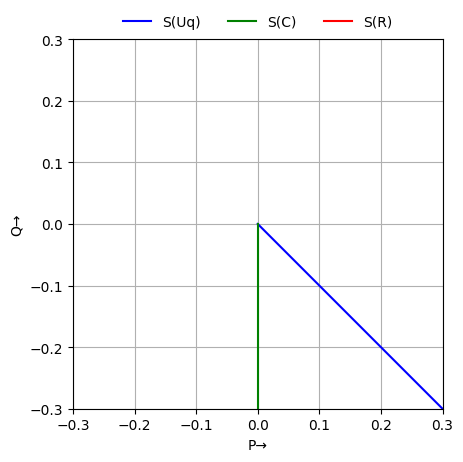

In [21]:
_ = power_pointer_diagram_analysis(
    plot_pointer_by_id('Uq', color='blue'),
    plot_pointer_by_id('C', color='green'),
    plot_pointer_by_id('R', origin='C', color='red'),
    solution=complex_solution,
    pd_lim=(-0.3, 0.3, -0.3, 0.3)
)

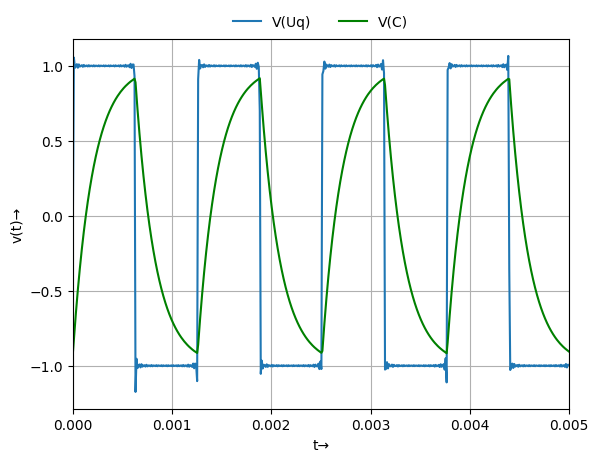

In [22]:
_ = steady_state_voltage_timedomain_analysis(
    plot_timeseries_by_id('Uq'),
    plot_timeseries_by_id('C', color='green'),
    solution=time_domain_solution,
    tmax=0.005
)

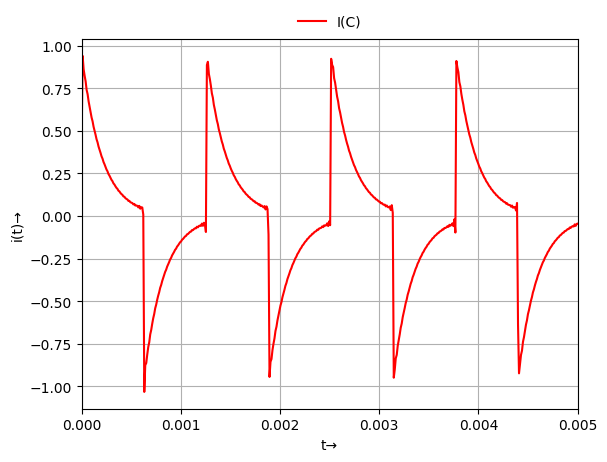

In [23]:
_ = steady_state_current_timedomain_analysis(
    plot_timeseries_by_id('C', color='red'),
    solution=time_domain_solution,
    tmax=0.005
)